<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/31Mar20_3_group_by_and_pivots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group By and Pivot Tables

### Introduction

Over the past few lessons, we saw how to find statistics over an entire dataframe, or regarding a specific column.  In this lesson, we'll see how we can partition the data in a dataframe or a series with group by and pivot tables.

### Loading our Data

In [0]:
import pandas as pd
url = url = "https://raw.githubusercontent.com/jigsawlabs-student/exploring-pandas/master/imdb_movies.csv"
df = pd.read_csv(url)

In [0]:
df.head()

,title,genre,budget,runtime,year,month,revenue
0,Avatar,Action,237000000,162.0,2009,12,2787965087
1,Pirates of the Caribbean: At World's End,Adventure,300000000,169.0,2007,5,961000000
2,Spectre,Action,245000000,148.0,2015,10,880674609
3,The Dark Knight Rises,Action,250000000,165.0,2012,7,1084939099
4,John Carter,Action,260000000,132.0,2012,3,284139100


### Exploring within Groups

Group by works well with data that is either categorical in nature.  When we have data categorical in nature, we can imagine grouping that data by categories, and then finding the aggregate statistics, like the mean or the maximum.

Here's how we can group our data by genre, and find the mean revenue across each genre.

In [0]:
df.groupby(['genre']).mean()

,budget,runtime,year,month,revenue
genre,,,,,
Action,6.994379e+07,113.028986,2004.532091,6.418219,1.803353e+08
Adventure,9.008632e+07,115.381356,2003.741525,7.203390,2.788796e+08
Animation,8.662127e+07,91.419355,2006.580645,7.021505,3.130796e+08
Comedy,4.175418e+07,105.245125,2005.144847,6.935933,1.069884e+08
Crime,4.443289e+07,120.000000,2004.644737,6.763158,9.344435e+07
Drama,4.497237e+07,126.775342,2003.084932,8.041096,1.038632e+08
Fantasy,7.210313e+07,106.662500,2004.987500,6.700000,1.894764e+08
Horror,3.481864e+07,101.203390,2002.237288,6.864407,8.491458e+07
Romance,4.363117e+07,110.725000,2006.225000,5.825000,1.124715e+08


> We can get rid of scientific notation with the following.

In [0]:
pd.options.display.float_format = '{:.2f}'.format

Notice that group by returns to us a dataframe for each of the numeric columns.

In [0]:
df.columns

Index(['title', 'genre', 'budget', 'runtime', 'year', 'month', 'revenue'], dtype='object')

We can then scope down that data to just select the revenue.

In [0]:
df.groupby(['genre']).mean()['revenue'].sort_values()

genre
Horror             84914577.80
Crime              93444346.83
Drama             103863203.52
Comedy            106988371.80
Romance           112471529.00
Thriller          133243758.53
Action            180335309.49
Fantasy           189476384.70
Science Fiction   268269924.02
Adventure         278879626.06
Animation         313079586.00
Name: revenue, dtype: float64

And then plot this, from there.

none


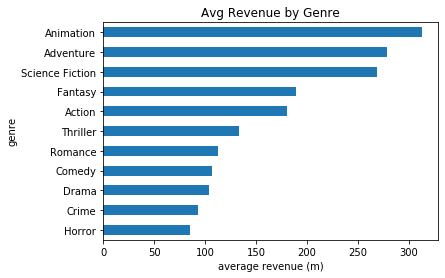

In [0]:
ax = df.groupby(['genre']).mean()['revenue'].sort_values().plot.barh()
ax.set(title = 'Avg Revenue by Genre', 
       xlabel = 'average revenue (m)',
       xticklabels = list(range(0, 310, 50)))
print('none')

### Grouping by Multiple Values

Now let's say that we wanted to group our data by genre and year.  We can do so with the following.

In [0]:
df.groupby(['genre', 'year']).mean()[:3]

budget     runtime  month      revenue
genre  year                                              
Action 1978  5.500000e+07  143.000000   12.0  300218018.0
       1979  3.450000e+07  119.500000    9.0  121031920.5
       1980  3.266667e+07  153.666667    8.0   64647679.0

Notice that this returns to us a dataframe that has two indices.  The outer one is genre, and then the inner is by year.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1219e54d0>],
      dtype=object)

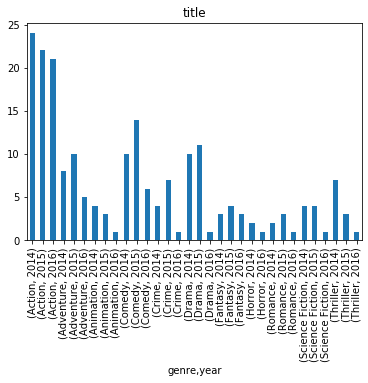

In [0]:
df[df['year'] > 2013 ].groupby(['genre', 'year']).count()['title'].plot.bar()

So in the data set above, we can see a downward trend in the amount of most of the categories, although action movies appear to have been the smallest downturn.

### Pivot Tables

Now pivot tables perform the same calculations as group by.  But in their presentation, the pivot tables allow us to better control what are the components of the dataframe, from the index, to the columns.

Let's use a pivot table to capture the average revenue across genres, fore each year after 2010.

In [0]:
df_pivot = pd.pivot_table(df[df['year'] > 2010], index=["year"], columns=["genre"], 
               values=["revenue"], aggfunc=np.mean)

In [0]:
df_pivot

revenue                                                      \
genre       Action    Adventure    Animation       Comedy        Crime   
year                                                                     
2011  240880374.42 261467678.45 358559319.00 120890809.00 109702299.33   
2012  275432225.18 414326105.33 382174960.14 108644503.94  90512024.25   
2013  242654455.29 447869360.00 375896902.55 110324406.50 186606081.00   
2014  287276588.12 352096096.25 220339158.75 118283953.10  70257707.50   
2015  415734720.32 171880610.70 343684701.00 113729622.43  61021114.43   
2016  311719134.29 353311188.20 875958308.00  75127174.00  15436808.00   

                                                                           \
genre        Drama      Fantasy       Horror      Romance Science Fiction   
year                                                                        
2011   78075523.00 124029199.75  70940362.00  98988416.75    127869379.00   
2012  151623615.54 138265579.25  75966077.50  79700000.00    871312914.67   
2013  119456960.82 197635539.67 116980662.00  72472695.50    294050203.60   
2014   84255706.80 526855068.33 143341896.50  48718553.00    757837473.00   
2015  248533903.18 145367798.25          nan 232492438.67    293606612.75   
2016   94061311.00 231891598.67 320170008.00  16374328.00    543934787.00   

                    
genre     Thriller  
year                
2011  240998690.80  
2012  169805081.00  
2013   54063921.57  
2014   94330364.29  
2015   86433035.33  
2016   93282604.00

One nice thing is that because pandas only creates subplots across columns, we can now create a graph with subplots, one for each selected genre. 

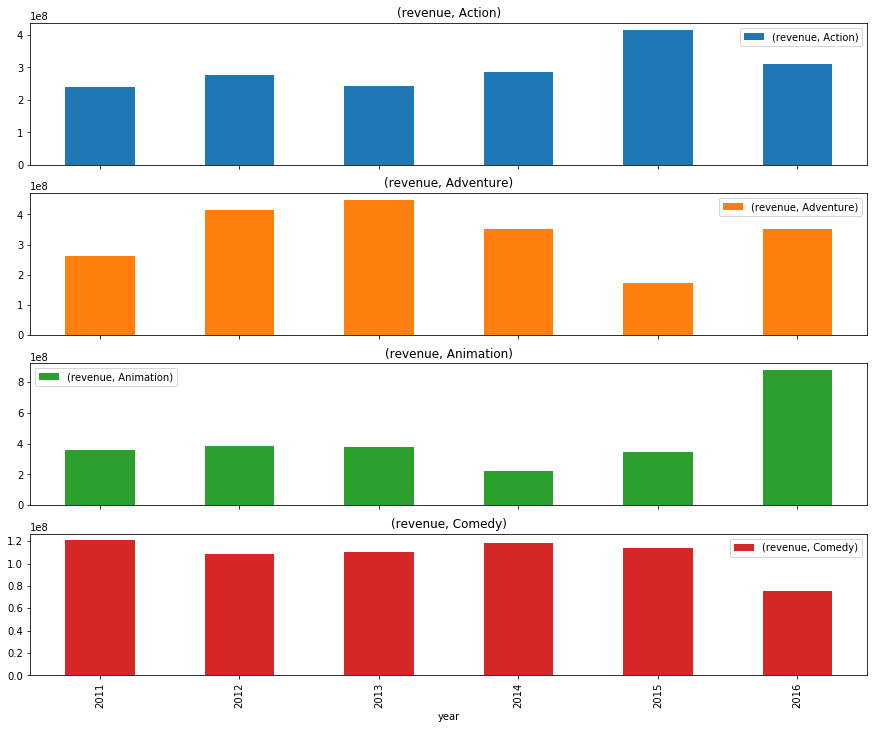

In [0]:
import matplotlib.pyplot as plt

df_pivot.iloc[:, :4].plot.bar(subplots = True)
fig = plt.gcf()
fig.set_size_inches(15, 12)

So above we have the average movie revenue by year, separated by genre.

Or we can also plot across columns in the same plot.

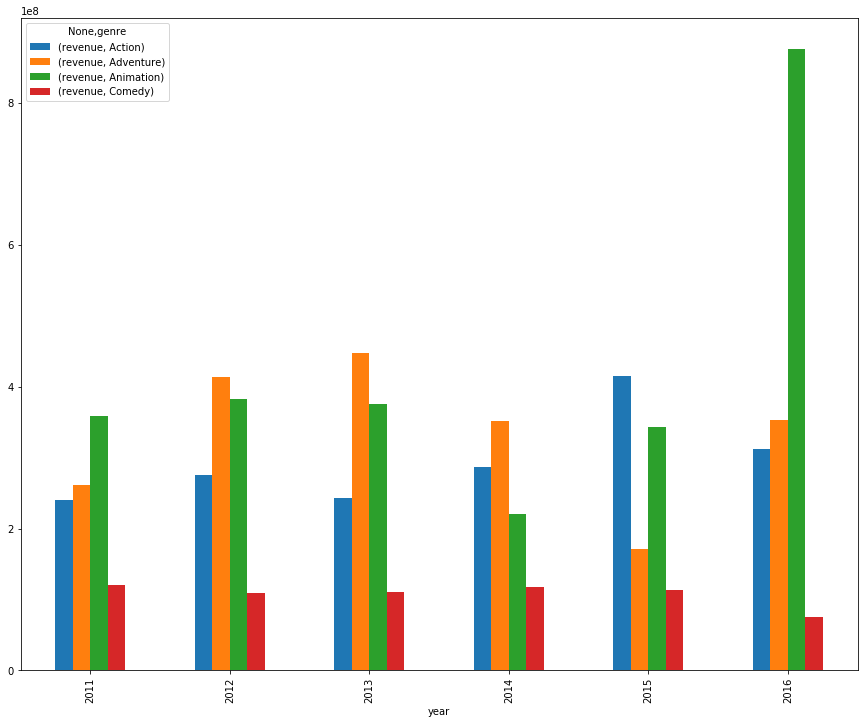

In [0]:
df_pivot.iloc[:, :4].plot.bar()
fig = plt.gcf()
fig.set_size_inches(15, 12)

### Summary

In this lesson we saw how to both perform aggregate queries and then plot this information.  We started with using group by which gives us aggregate statistics across multiple columns.

From there, we moved onto the `pivot_table` function in pandas.  And we saw that with a pivot table, we can control what information is displayed across rows or columns.  Because pandas plots data across columns, we can use pivot tables to help us refine our plots in pandas.